# Tópicos de regressão

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import csv
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

### Dados simulados segundo a função:
$f(x) = x \cdot (\cos(x) + 1) + \zeta; \ \ \zeta \sim \mathcal{N}(0,1)$

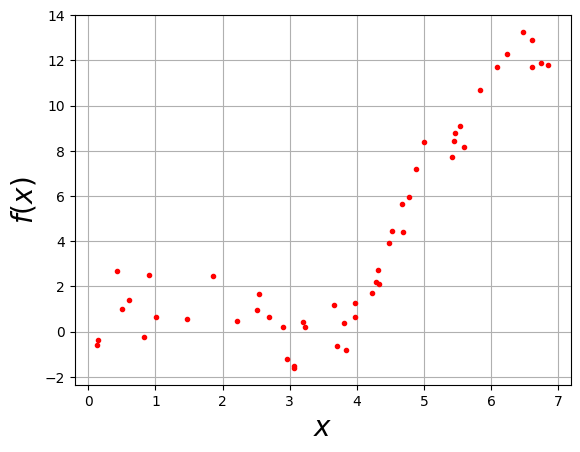

In [235]:
np.random.seed(0)
x = np.random.uniform(0,7,50).reshape(-1,1)
y = x + np.cos(x)*x + np.random.normal(0,1,len(x)).reshape(-1,1)

plt.plot(x,y,'r.')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)
plt.grid()

## Regressão linear (uma variável)

Coeficientes:  [[1.90345681]]
Bias:  [-3.17574943]


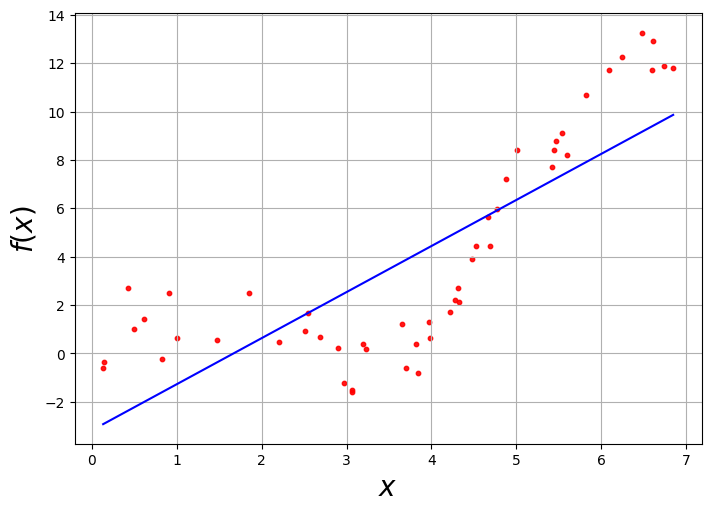

In [236]:
regLin = LinearRegression()
regLin.fit(x,y)

print('Coeficientes: ',regLin.coef_)
print('Bias: ',regLin.intercept_)

xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
yEst = regLin.predict(xVals)

FS = (7,5)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(x,y,s=10,c='r',alpha=0.90)
ax.plot(xVals,yEst,color='blue')
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f(x)$',fontsize=20)
ax.grid()
plt.show()

### Transformação/mapeamento polinomial (de uma variável)

In [237]:
pol = PolynomialFeatures(4)
polX = pol.fit_transform(x)

## Regressão polinomial (uma variável)

Coeficientes:  [[ 0.          8.36524799 -6.23724875  1.52103864 -0.10900606]]
Bias:  [-1.57651734]


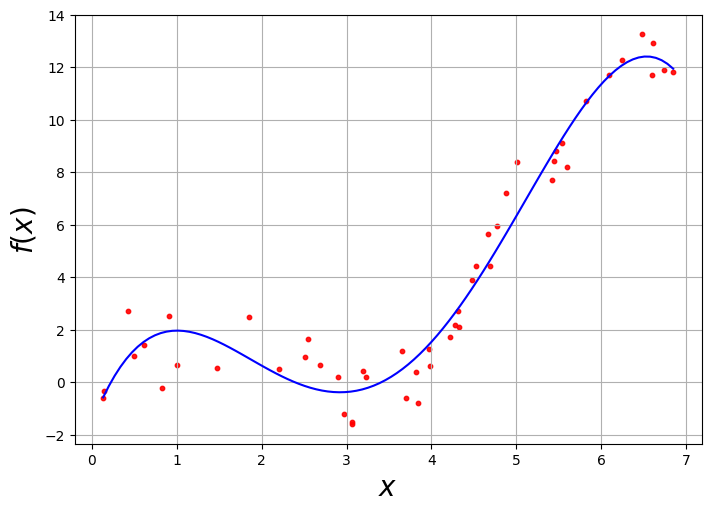

In [238]:
regLin = LinearRegression()
regLin.fit(polX, y)

print('Coeficientes: ',regLin.coef_)
print('Bias: ',regLin.intercept_)

xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
polXVals = pol.fit_transform(xVals)
yEst = regLin.predict(polXVals)

FS = (7,5)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(x,y,s=10,c='r',alpha=0.90)
ax.plot(xVals,yEst,color='blue')
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f(x)$',fontsize=20)
ax.grid()
plt.show()

## Regressão Ridge (uma variável)
* Implementação algébrica

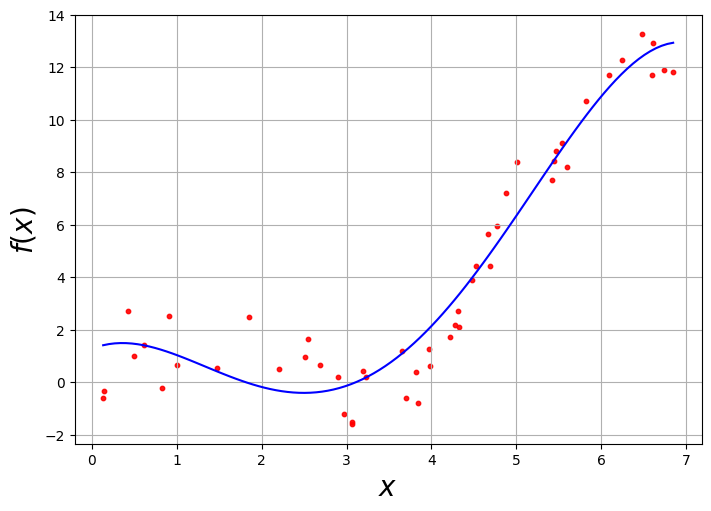

In [239]:
alpha = 1.0

#Cálculos algébricos
xTx  = np.dot(polX.T,polX)
A = alpha*np.identity(xTx.shape[0]); A[0,0]=0
LF = np.linalg.inv(xTx + A)
RF = np.dot(polX.T,y)
thetas = np.dot(LF,RF)
bias = 0.5*np.linalg.norm(thetas/np.sum(np.abs(thetas)))**2
xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
polVals = pol.transform(xVals)
yEst = np.zeros(polVals.shape[0])

for i in range(polVals.shape[0]):
    yEst[i] = np.dot(polVals[i,:],thetas) + bias

FS = (7,5)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(x,y,s=10,c='r',alpha=0.90)
ax.plot(xVals,yEst,color='blue')
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f(x)$',fontsize=20)
ax.grid()
plt.show()

## Regressão Lasso (uma variável)

[ 0.         -0.         -0.          0.03673908  0.001352  ]
[-0.08253654]


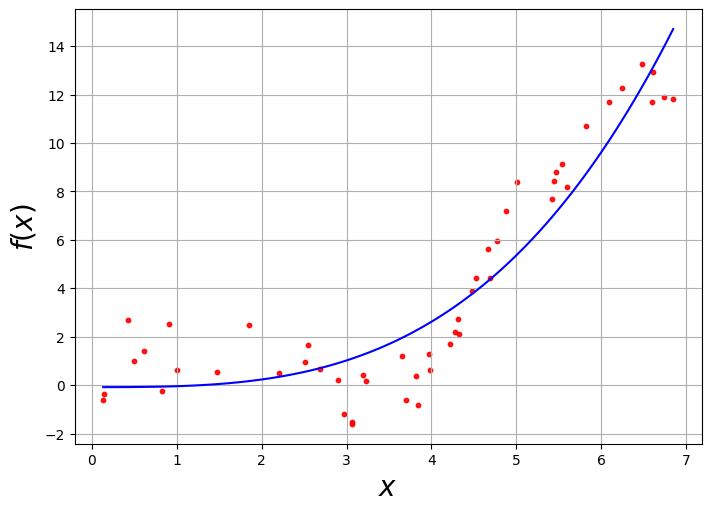

In [240]:
regLasso = Lasso(alpha=1.0, max_iter=1000, tol=10**-2)
regLasso.fit(polX,y)

print(regLasso.coef_)
print(regLasso.intercept_)

xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
polVals = pol.transform(xVals)
yEst = regLasso.predict(polVals)

FS = (7,5)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

plt.scatter(x,y,s=10,c='r',alpha=0.90)
plt.plot(xVals,yEst,color='blue')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)
plt.grid()
plt.show()

## Regressão Logit e Softmax

In [241]:
def read_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack((data, np.asarray(row).astype(float))) # type: ignore
            except:
                data = np.asarray(row).astype(float)
    f.close()
    return data # type: ignore

#### "Haberman's Survival Data Set" (https://archive.ics.uci.edu/ml/datasets/Haberman%27s%2BSurvival)

##### Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.

##### Atributos:
* Idade do paciente
* Ano da operação
* Número de nódulos (axiliares) detectados
* Condição:
 * 1: sobreviveu 5 anos ou mais
 * 2: faleceu em 5 anos

In [242]:
path = 'Data/haberman.dat'
nomes = ['Idade','Ano','Nódulos','Condição']

data = read_data(path)

atributos = [0,1,2]
x = data[:,atributos]
y = data[:,3].reshape(-1,1) -1 

percentualTeste = 0.33
xD, xI, yD, yI = train_test_split(x, y, test_size=percentualTeste)

Text(0, 0.5, 'Condição')

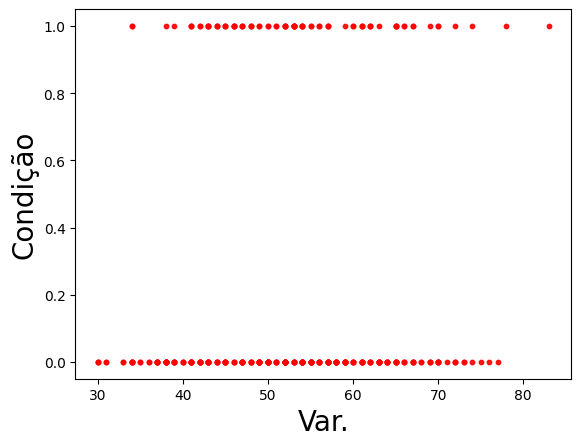

In [243]:
plt.scatter(x[:,0], y, s=10, c='r', alpha=0.90)
plt.xlabel('Var.', fontsize=20)
plt.ylabel('Condição', fontsize=20)

In [244]:
percentualTeste = 0.33
xD, xI, yD, yI = train_test_split(x, y, test_size=percentualTeste)

regLogit = LogisticRegression()
regLogit.fit(xD, yD)
yEst = regLogit.predict(xI)
yEstProb = regLogit.predict_proba(xI)

acerto = np.count_nonzero(yI[:,0] == yEst[:])/y.shape[0]
print(acerto)


0.24183006535947713


## SVM

In [245]:
percentualTeste = 0.33
xD, xI, yD, yI = train_test_split(x, y, test_size=percentualTeste)

regSVR = SVR(kernel='rbf', gamma=1.0, epsilon=0.001, C=100)
regSVR.fit(xD, yD)
yEst = regSVR.predict(xI)

yEst = np.round(yEst)

acerto = accuracy_score(yI, yEst)
print(acerto)

0.7128712871287128


## CART

In [246]:
percentualTeste = 0.33
xD, xI, yD, yI = train_test_split(x, y, test_size=percentualTeste)

regCart = DecisionTreeRegressor(criterion='squared_error', min_samples_split=10, min_impurity_decrease=10**(-7))
regCart.fit(xD, yD)

yEst = regCart.predict(xI)
yEst = np.round(yEst)

acerto = accuracy_score(yI, yEst)
print(acerto)

0.6732673267326733


### Processo de avaliação/seleção

In [247]:
def medidaAvaliaModelo(x,y,d,q,r):
    pol = PolynomialFeatures(d)
    regLin = LinearRegression()
    sGeral = 0
    for perc in np.linspace(0.1,0.9,q):
        vec = []
        for _ in range(r):
            xD, xI, yD, yI = train_test_split(x,y,test_size=perc)
            polXD = pol.fit_transform(xD)
            polXI = pol.fit_transform(xI)
            regLin.fit(polXD,yD)
            estYI = regLin.predict(polXI)
            vec.append( np.sum( (estYI - yI)**2 )/len(yI) )
        
        sGeral += np.mean(vec)
        
    return sGeral

In [248]:
ds = [1,2,3,4,5,6,7,8,9]
vec = []
for i in ds:
    vec.append(np.log10(medidaAvaliaModelo(x,y,i,10,100)))
    print('Grau: ',i,' -- SEQ Mediano: ',vec[-1])

Grau:  1  -- SEQ Mediano:  0.2800549418489352
Grau:  2  -- SEQ Mediano:  0.44494413675327266
Grau:  3  -- SEQ Mediano:  3.1454386007627604
Grau:  4  -- SEQ Mediano:  12.54506137251791
Grau:  5  -- SEQ Mediano:  12.0276686596256
Grau:  6  -- SEQ Mediano:  16.43059010064861
Grau:  7  -- SEQ Mediano:  15.514174344207849
Grau:  8  -- SEQ Mediano:  16.445096098391232
Grau:  9  -- SEQ Mediano:  17.634477853905615


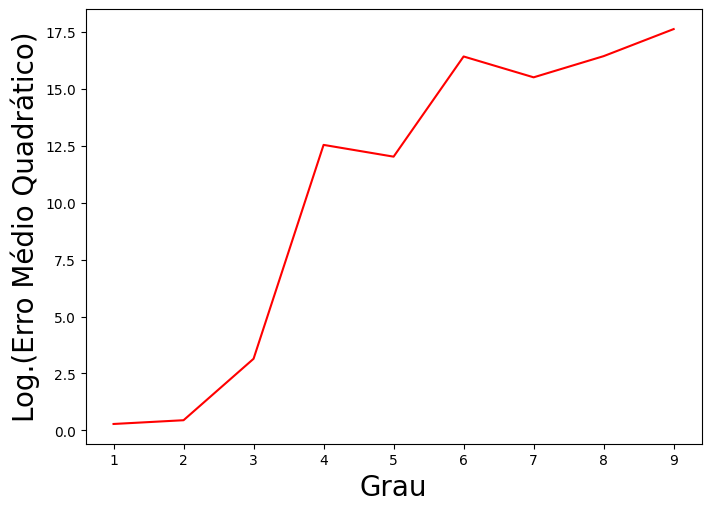

In [249]:
FS = (7,5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0])
ax.plot(ds,vec,'r-')
ax.set_xlabel('Grau',fontsize=20)
ax.set_ylabel('Log.(Erro Médio Quadrático)',fontsize=20)
plt.show()